In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

## Question 1.a)

In [2]:
# set parameters
L = 1.0
pi = numpy.pi
dx = 0.01 # x resolution
N_x = int(L/dx) + 1 # number of time steps
x = numpy.linspace(0.0, L, num=N_x)
T_compute = numpy.zeros((5, N_x)) # store 5 different resolutions results
terms_grid = numpy.array([1, 2, 5, 100, 1000])

In [3]:
i = 0 # index for (i+1)-th grid resolution
T_compute = numpy.zeros((5, N_x)) # clear
for j in terms_grid:
    for n in range(1,j+1): # calculate summation
        T_compute[i] = T_compute[i] + (-1) ** (n + 1) / (2 * n - 1) * \
                        numpy.cos((2 * n - 1) * pi * x / (2 * L))
    T_compute[i] = T_compute[i] * 4 / pi
    i = i + 1

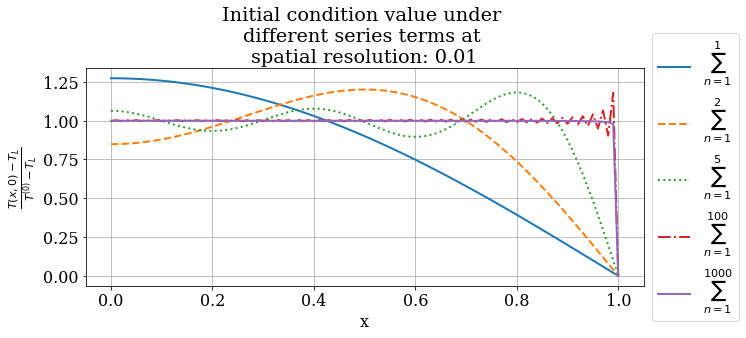

In [4]:
# plot
pyplot.figure(figsize=(10.0, 4.0))
pyplot.title('Initial condition value under \ndifferent series terms at \nspatial resolution: {}'.format(dx))
pyplot.xlabel('x')
pyplot.ylabel(r'$ \frac{T(x,0) - T_L}{T^{(0)} - T_L} $')
pyplot.grid()
pyplot.plot(x, T_compute[0], label=r'$ \sum_{n=1}^{1}$',
            color='C0', linestyle='-', linewidth=2)
pyplot.plot(x, T_compute[1], label=r'$ \sum_{n=1}^{2}$',
            color='C1', linestyle='--', linewidth=2)
pyplot.plot(x, T_compute[2], label=r'$ \sum_{n=1}^{5}$',
            color='C2', linestyle=':', linewidth=2)
pyplot.plot(x, T_compute[3], label=r'$ \sum_{n=1}^{100}$',
            color='C3', linestyle='-.', linewidth=2)
pyplot.plot(x, T_compute[4], label=r'$ \sum_{n=1}^{1000}$',
            color='C4', linestyle='-', linewidth=2)
pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5));

### Peformance of Different Number of Series Terms

As one should know from initial condition, the $T^{(0)}(x)$ is a consant, which means the value of $ \frac{T(x,0) - T_L}{T^{(0)} - T_L} $ would be euqal to 1.

Therefore, by looking through all curves above, with the number of series terms increasing, the value is more closer to constant 1.

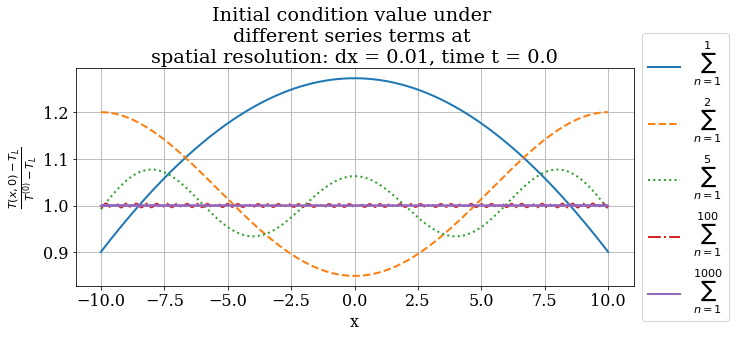

In [2]:
# if expand to (-10 , 10)
# set parameters
x_begin = -10.0
x_end = 10.0
L = x_end - x_begin
pi = numpy.pi
dx = 0.01 # x resolution
N_x = int(L/dx) + 1 # number of time steps
x = numpy.linspace(x_begin, x_end, num=N_x)
T_compute = numpy.zeros((5, N_x)) # store 5 different resolutions results
terms_grid = numpy.array([1, 2, 5, 100, 1000])

i = 0 # index for (i+1)-th grid resolution
T_compute = numpy.zeros((5, N_x)) # clear
for j in terms_grid:
    for n in range(1,j+1): # calculate summation
        T_compute[i] = T_compute[i] + (-1) ** (n + 1) / (2 * n - 1) * \
                        numpy.cos((2 * n - 1) * pi * x / (2 * L))
    T_compute[i] = T_compute[i] * 4 / pi
    i = i + 1
    
# plot
pyplot.figure(figsize=(10.0, 4.0))
pyplot.title('Initial condition value under \n\
different series terms at \nspatial resolution: dx = {}, time t = 0.0'.format(dx))
pyplot.xlabel('x')
pyplot.ylabel(r'$ \frac{T(x,0) - T_L}{T^{(0)} - T_L} $')
pyplot.grid()
pyplot.plot(x, T_compute[0], label=r'$ \sum_{n=1}^{1}$',
            color='C0', linestyle='-', linewidth=2)
pyplot.plot(x, T_compute[1], label=r'$ \sum_{n=1}^{2}$',
            color='C1', linestyle='--', linewidth=2)
pyplot.plot(x, T_compute[2], label=r'$ \sum_{n=1}^{5}$',
            color='C2', linestyle=':', linewidth=2)
pyplot.plot(x, T_compute[3], label=r'$ \sum_{n=1}^{100}$',
            color='C3', linestyle='-.', linewidth=2)
pyplot.plot(x, T_compute[4], label=r'$ \sum_{n=1}^{1000}$',
            color='C4', linestyle='-', linewidth=2)
pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5));

The period is the suumation of different amplitude and period cosine function. With the number of series increasing, the value of each point is converging to the 1.0, which is the ideal value.

## Question 1.b)

In [6]:
# set parameters
t_grid = numpy.array([0.1, 0.5, 1.0, 10.0])
D = 1.0
L = 1.0
terms_grid = 100
pi = numpy.pi
dx = 0.01
N_x = int(L/dx) + 1
x = numpy.linspace(0.0, L, N_x)
T_compute = numpy.zeros((4, N_x)) # store 4 different resolutions results

In [7]:
i = 0
T_compute = numpy.zeros((4, N_x)) # clear
for t in t_grid:
    for n in range(1, terms_grid+1):
        eigen_value = (2 * n - 1) * pi / (2 * L)
        T_compute[i] = T_compute[i] + (-1) ** (n + 1) / (2 * n - 1) * \
                        numpy.cos(eigen_value * x) * \
                        numpy.exp(-D * t * (eigen_value ** 2))
    T_compute[i] = T_compute[i] * 4 / pi
    i = i + 1

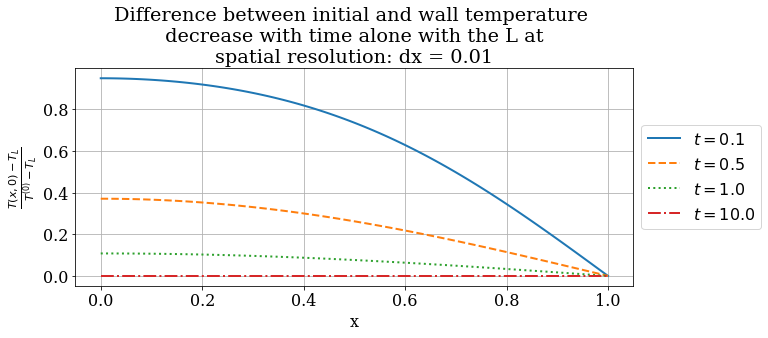

In [8]:
# plot
pyplot.figure(figsize=(10.0, 4.0))
pyplot.title('Difference between initial and wall temperature \
\n decrease with time alone with the L at \nspatial resolution: dx = {}'.format(dx))
pyplot.xlabel('x')
pyplot.ylabel(r'$ \frac{T(x,0) - T_L}{T^{(0)} - T_L} $')
pyplot.grid()
pyplot.plot(x, T_compute[0], label=r'$t = 0.1$',
            color='C0', linestyle='-', linewidth=2)
pyplot.plot(x, T_compute[1], label=r'$t = 0.5$',
            color='C1', linestyle='--', linewidth=2)
pyplot.plot(x, T_compute[2], label=r'$t = 1.0$',
            color='C2', linestyle=':', linewidth=2)
pyplot.plot(x, T_compute[3], label=r'$t = 10.0$',
            color='C3', linestyle='-.', linewidth=2)
pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5));

### The Curve Varies with Time

As one should know from initial condition, the $T^{(0)}(x) = T^{(0)} + \frac{T_L - T^{(0)}}{L}x $, which means the value of $ \frac{T(x,0) - T_L}{T^{(0)} - T_L} $ would be simplified:

$$
\begin{equation}
\frac{T(x,0) - T_L}{T^{(0)} - T_L} = \frac{T^{(0)}}{T^{(0)} - T_L} - \frac{1}{L}x
\end{equation}
$$

which is a slope that is equal to $-\frac{1}{L}$ line, starting from $\frac{T^{(0)}}{T^{(0)} - T_L}$, which indicates the line at $t = 0.1$ is about correct.

Also, with time flows, the exponential terms will eventually goes close to zero, which indicates the temperature in the space is eventually equal to the wall temperature.

## Question 1.c)

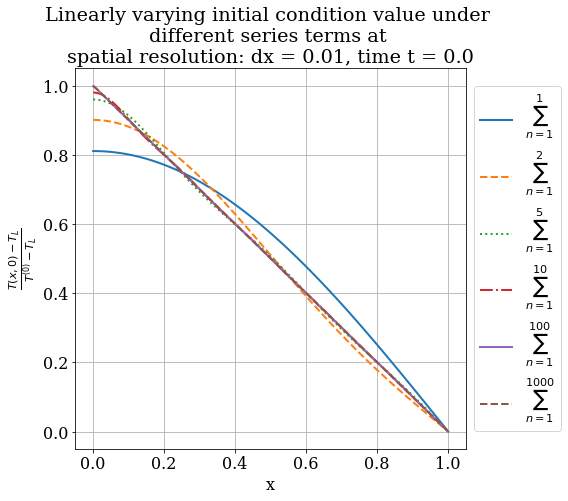

In [9]:
# set parameters
x_begin = 0.0
x_end = 1.0
L = x_end - x_begin
pi = numpy.pi
dx = 0.01 # x resolution
N_x = int(L/dx) + 1 # number of time steps
x = numpy.linspace(x_begin, x_end, num=N_x)
T_compute = numpy.zeros((6, N_x)) # store 6 different resolutions results
terms_grid = numpy.array([1, 2, 5, 10, 100, 1000])

i = 0 # index for (i+1)-th grid resolution
T_compute = numpy.zeros((6, N_x)) # clear
for j in terms_grid:
    for n in range(1,j+1): # calculate summation
        T_compute[i] = T_compute[i] + (1 / ((2 * n -1) ** 2)) * \
                        numpy.cos((2 * n - 1) * pi * x / (2 * L))
    T_compute[i] = T_compute[i] * 8 / (pi ** 2)
    i = i + 1
    
# plot
pyplot.figure(figsize=(7.0, 7.0))
pyplot.title('Linearly varying initial condition value under \n\
different series terms at \nspatial resolution: dx = {}, time t = 0.0'.format(dx))
pyplot.xlabel('x')
pyplot.ylabel(r'$ \frac{T(x,0) - T_L}{T^{(0)} - T_L} $')
pyplot.grid()
pyplot.plot(x, T_compute[0], label=r'$ \sum_{n=1}^{1}$',
            color='C0', linestyle='-', linewidth=2)
pyplot.plot(x, T_compute[1], label=r'$ \sum_{n=1}^{2}$',
            color='C1', linestyle='--', linewidth=2)
pyplot.plot(x, T_compute[2], label=r'$ \sum_{n=1}^{5}$',
            color='C2', linestyle=':', linewidth=2)
pyplot.plot(x, T_compute[3], label=r'$ \sum_{n=1}^{10}$',
            color='C3', linestyle='-.', linewidth=2)
pyplot.plot(x, T_compute[4], label=r'$ \sum_{n=1}^{100}$',
            color='C4', linestyle='-', linewidth=2)
pyplot.plot(x, T_compute[5], label=r'$ \sum_{n=1}^{1000}$',
            color='C5', linestyle='--', linewidth=2)
pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5));

### Peformance of Different Number of Series Terms

As one should know from initial condition, the $T^{(0)}(x) = T^{(0)} + \frac{T_L - T^{(0)}}{L}x $, which means the value of $ \frac{T(x,0) - T_L}{T^{(0)} - T_L} $ would be simplified:

$$
\begin{equation}
\frac{T(x,0) - T_L}{T^{(0)} - T_L} = \frac{T^{(0)}}{T^{(0)} - T_L} - \frac{1}{L}x
\end{equation}
$$

which is a slope that is equal to $-\frac{1}{L}$ line, in this case L = 1, starting from $\frac{T^{(0)}}{T^{(0)} - T_L}$.

Therefore, if one could look through the curves, with the number of series terms increasing, the curve is closer to the ideal line.

## Question 1.d)

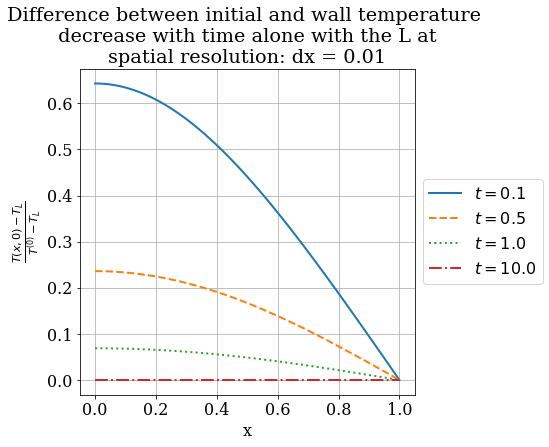

In [10]:
# set parameters
t_grid = numpy.array([0.1, 0.5, 1.0, 10.0])
D = 1.0
L = 1.0
terms_grid = 100
pi = numpy.pi
dx = 0.01
N_x = int(L/dx) + 1
x = numpy.linspace(0.0, L, N_x)
T_compute = numpy.zeros((4, N_x)) # store 4 different resolutions results

# compute
i = 0
T_compute = numpy.zeros((4, N_x)) # clear
for t in t_grid:
    for n in range(1, terms_grid+1):
        eigen_value = (2 * n - 1) * pi / (2 * L)
        T_compute[i] = T_compute[i] + (1 / ((2 * n -1) ** 2)) * \
                        numpy.cos(eigen_value * x) * \
                        numpy.exp(-D * t * (eigen_value ** 2))
    T_compute[i] = T_compute[i] * 8 / (pi ** 2)
    i = i + 1
    
# plot
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('Difference between initial and wall temperature \
\n decrease with time alone with the L at \nspatial resolution: dx = {}'.format(dx))
pyplot.xlabel('x')
pyplot.ylabel(r'$ \frac{T(x,0) - T_L}{T^{(0)} - T_L} $')
pyplot.grid()
pyplot.plot(x, T_compute[0], label=r'$t = 0.1$',
            color='C0', linestyle='-', linewidth=2)
pyplot.plot(x, T_compute[1], label=r'$t = 0.5$',
            color='C1', linestyle='--', linewidth=2)
pyplot.plot(x, T_compute[2], label=r'$t = 1.0$',
            color='C2', linestyle=':', linewidth=2)
pyplot.plot(x, T_compute[3], label=r'$t = 10.0$',
            color='C3', linestyle='-.', linewidth=2)
pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5));

### The Curve Varies with Time

Similar with Q1.b, with time flows, the exponential terms will eventually goes close to zero, which indicates the temperature in the space is eventually equal to the wall temperature.